In [1]:
%matplotlib inline

import os
import numpy as np
from skimage import data, io, filters, transform
import shutil
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
train_path = '.\\data\\train\\'
test_path = '.\\data\\test\\'

print('# of training files: ' + str(len(os.listdir(train_path))))
print('# of testing files: ' + str(len(os.listdir(test_path))))

# Load train labels in Data Frame
train_labels = pd.read_csv("data/train_labels.csv")

train_labels.head()

# of training files: 2297
# of testing files: 1531


,name,invasive
0,1,0
1,2,0
2,3,1
3,4,0
4,5,1


In [3]:
# Show image of non-ivasive class
for file_id in range(0, train_labels.shape[0]):
    
    file_name = ".\\data\\train\\" + str(train_labels["name"][file_id]) + ".jpg"
    image = io.imread(file_name)
    
    if train_labels["invasive"][file_id] == 1:
        file_name_new = ".\\data\\train\\1\\" + str(train_labels["name"][file_id]) + ".jpg"    
    else:
        file_name_new = ".\\data\\train\\0\\" + str(train_labels["name"][file_id]) + ".jpg"        
    
    shutil.copy(file_name, file_name_new)

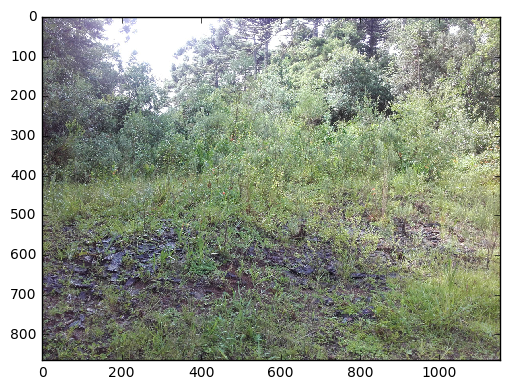

In [68]:
# Show image of ivasive class
file_id = 2
file_name = ".\\data\\test\\" + str(train_labels["name"][file_id]) + ".jpg"
image = io.imread(file_name)
io.imshow(image)

In [69]:
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)

In [70]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
metrics=['accuracy'])

In [71]:
batch_size = 16

In [74]:
train_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '.\\data\\train\\',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '.\\data\\val\\',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 1499 images belonging to 2 classes.
Found 1470 images belonging to 2 classes.


In [75]:
# Look at how tensors affect output shape
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 34, 34, 64)        18496     
__________

In [77]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=4,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model.save_weights('first_try.h5')

Epoch 1/4
125/125 [==============================] - 129s - loss: 5.8494 - acc: 0.6331 - val_loss: 3.2364 - val_acc: 0.7970
Epoch 2/4
125/125 [==============================] - 123s - loss: 5.7886 - acc: 0.6369 - val_loss: 3.3080 - val_acc: 0.7925
Epoch 3/4
125/125 [==============================] - 126s - loss: 5.6314 - acc: 0.6468 - val_loss: 3.3163 - val_acc: 0.7920
Epoch 4/4
125/125 [==============================] - 130s - loss: 5.9981 - acc: 0.6238 - val_loss: 3.2483 - val_acc: 0.7963
